In [31]:
import numpy as np
import pandas as pd
import csv
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

os.getcwd()

'/Users/maccon/Desktop/W210-master'

In [38]:
data = pd.read_csv('./Merged.csv', sep=',')
labels = pd.read_csv('./Labels.csv', sep=',')
data = data[0:8044]
print (data.shape)
print (labels.shape)


(8044, 98)
(8044, 1)


In [39]:
np.random.seed(0)
msk = np.random.rand(data.shape[0]) < 0.75

split_train_data = data[msk]
split_train_labels = labels[msk]

split_test_data = data[~msk]
split_test_labels = labels[~msk]

print (split_test_data.shape)
print (split_test_labels.shape)
print (split_train_data.shape)
print (split_train_labels.shape)

(1978, 98)
(1978, 1)
(6066, 98)
(6066, 1)


In [40]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(split_train_data, split_train_labels)
    test_preds = knn.predict(split_test_data)
    print ("K:", k, "F1:", metrics.accuracy_score(split_test_labels, test_preds))


for i in [1,3,5,7,9,11,13,15]:
    KNN(i)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


K: 1 F1: 0.657229524772
K: 3 F1: 0.68806875632
K: 5 F1: 0.703741152679
K: 7 F1: 0.715874620829
K: 9 F1: 0.719919110212
K: 11 F1: 0.727502527806
K: 13 F1: 0.738119312437
K: 15 F1: 0.738119312437


In [41]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(split_train_data, split_train_labels)

print ('Accuracy (a random forest):', rfc.score(split_test_data, split_test_labels))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.1)

abc.fit(split_train_data, split_train_labels)
print ('Accuracy (adaboost with decision trees):', abc.score(split_test_data, split_test_labels))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy (a random forest): 0.798281092012


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (adaboost with decision trees): 0.819009100101


In [42]:
for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 50, 100]:
    logreg = LogisticRegression(C=c, penalty='l1')
    logreg.fit(split_train_data, split_train_labels)
    logregPred = logreg.predict(split_test_data)
    print("C:", c, "F1:", metrics.accuracy_score(split_test_labels,logregPred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.0001 F1: 0.781092012133
C: 0.001 F1: 0.784630940344
C: 0.01 F1: 0.790697674419
C: 0.1 F1: 0.82052578362
C: 1.0 F1: 0.821031344793
C: 2.0 F1: 0.822548028311
C: 5.0 F1: 0.822548028311
C: 50 F1: 0.822042467139
C: 100 F1: 0.821536905966


In [44]:
labels2 = pd.read_csv('./Labels2.csv', sep=',')
print (labels2.shape)

(8044, 1)


In [45]:
np.random.seed(0)
msk2 = np.random.rand(data.shape[0]) < 0.75

split_train_data2 = data[msk2]
split_train_labels2 = labels2[msk2]

split_test_data2 = data[~msk2]
split_test_labels2 = labels2[~msk2]

print (split_test_data2.shape)
print (split_test_labels2.shape)
print (split_train_data2.shape)
print (split_train_labels2.shape)

(1978, 98)
(1978, 1)
(6066, 98)
(6066, 1)


In [46]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(split_train_data2, split_train_labels2)
    test_preds = knn.predict(split_test_data2)
    print ("K:", k, "F1:", metrics.accuracy_score(split_test_labels2, test_preds))


for i in [1,3,5,7,9,11,13,15]:
    KNN(i)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


K: 1 F1: 0.625884732053
K: 3 F1: 0.668857431749
K: 5 F1: 0.68301314459
K: 7 F1: 0.689079878665
K: 9 F1: 0.698179979778
K: 11 F1: 0.697674418605
K: 13 F1: 0.702224469161
K: 15 F1: 0.706268958544


In [47]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(split_train_data2, split_train_labels2)

print ('Accuracy (a random forest):', rfc.score(split_test_data2, split_test_labels2))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.1)

abc.fit(split_train_data2, split_train_labels2)
print ('Accuracy (adaboost with decision trees):', abc.score(split_test_data2, split_test_labels2))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy (a random forest): 0.834175935288


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (adaboost with decision trees): 0.82406471183


In [48]:
for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 50, 100]:
    logreg = LogisticRegression(C=c, penalty='l1')
    logreg.fit(split_train_data2, split_train_labels2)
    logregPred = logreg.predict(split_test_data2)
    print("C:", c, "F1:", metrics.accuracy_score(split_test_labels2,logregPred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.0001 F1: 0.752780586451
C: 0.001 F1: 0.747219413549
C: 0.01 F1: 0.819009100101
C: 0.1 F1: 0.830131445905
C: 1.0 F1: 0.828109201213
C: 2.0 F1: 0.830637007078
C: 5.0 F1: 0.830131445905
C: 50 F1: 0.830131445905
C: 100 F1: 0.831142568251


99% explained variance achieved at: 6 components


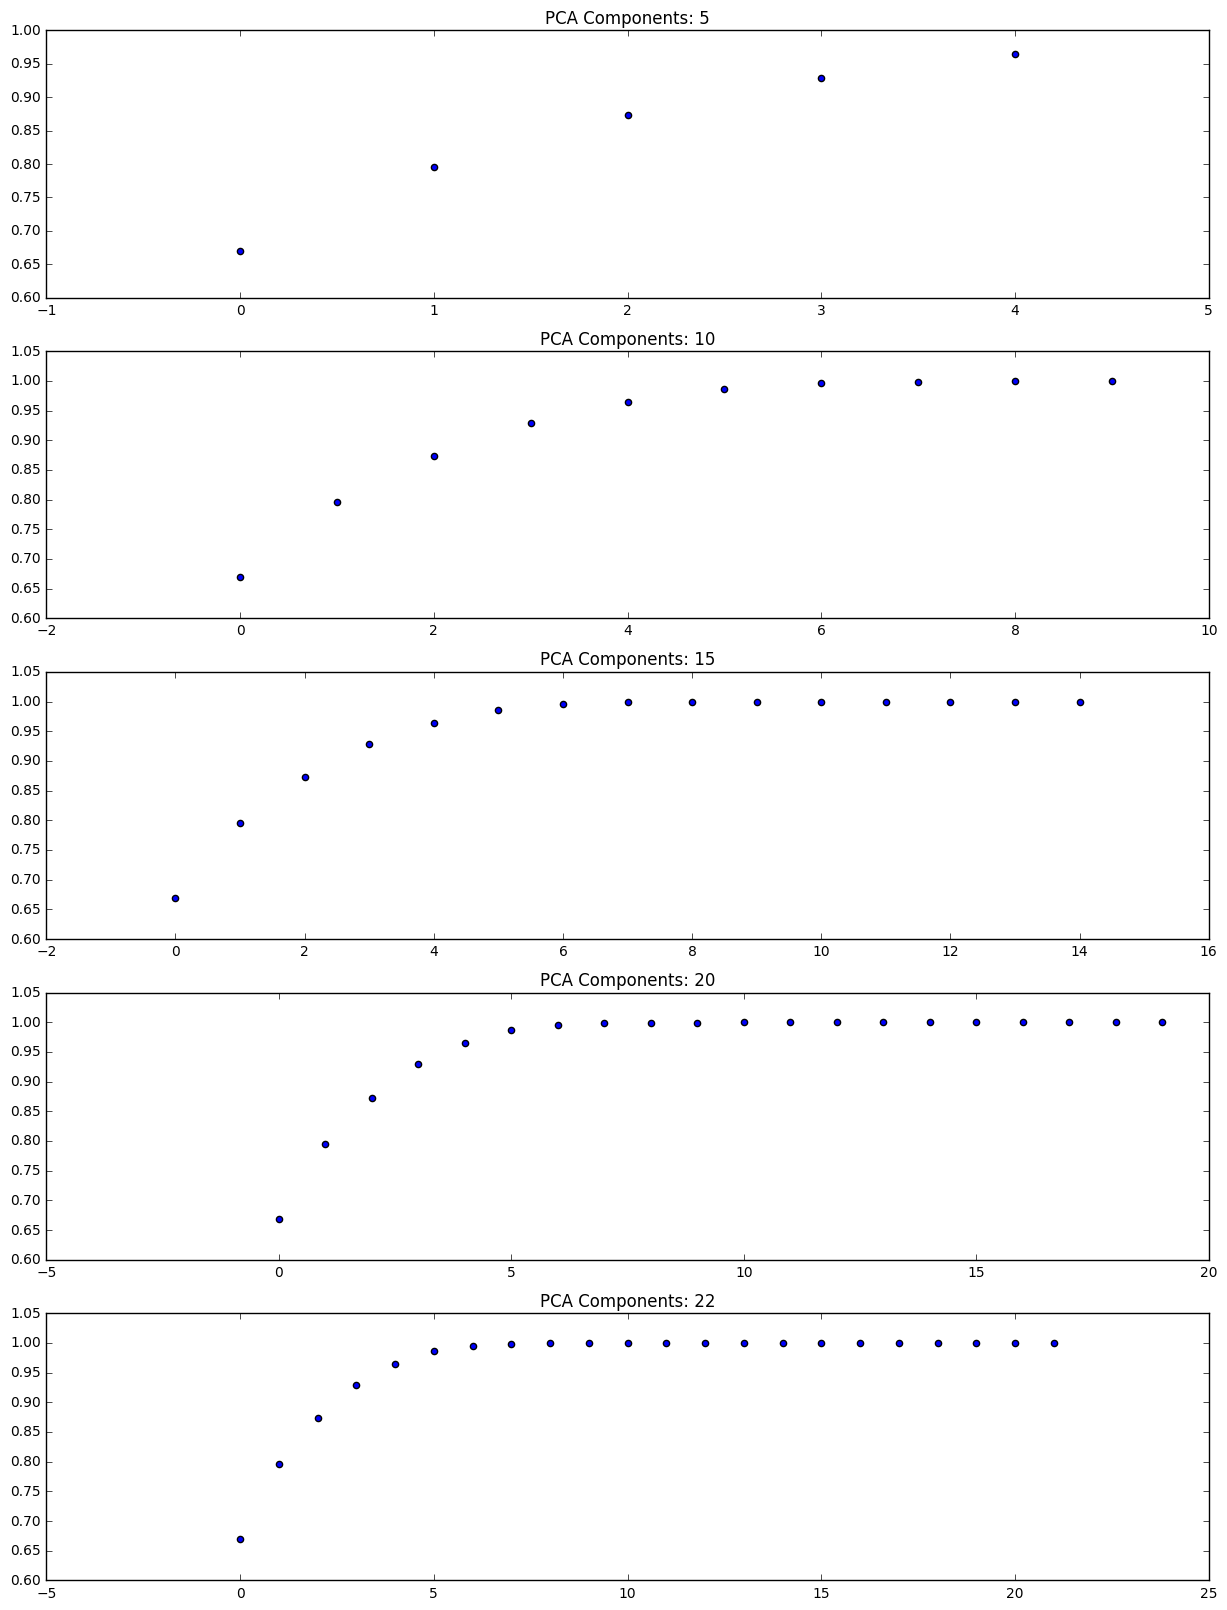

In [49]:
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def PCA_Plot():
    pca_feat = [5,10,15,20,22]
    plt.figure(figsize=(15,20))

    # Loop through the pca component values
    for i in range(len(pca_feat)):

        # Fit PCA
        k_pca = PCA(n_components=pca_feat[i]).fit(data)

        # Establish temporary variables
        cum_vars = []
        p1_cum_var = 0
        target=0

        # Create Subplot
        ax = plt.subplot(len(pca_feat),1,i+1)

        # loop through each individual PCA component and create a list of the 
        # incremental increases of explained variance
        for k in range(pca_feat[i]):
            p1_cum_var += k_pca.explained_variance_ratio_[k]
            cum_vars.append(p1_cum_var)

            # Identify the point where we have 90% explained variance
            if((p1_cum_var >= 0.99) & (target==0)):
                target = k 

        # Plot the data
        plt.scatter(range(pca_feat[i]),cum_vars)
        plt.title("PCA Components: %s" % pca_feat[i])
    print ("99% explained variance achieved at:", target, "components")
    plt.show()
PCA_Plot()

6066
[[ 174886.75618248  -23003.11146762]
 [  87492.43128026  -46904.93374875]
 [  47973.81262595  -27276.69859983]
 [  25956.53003257  -24831.86610952]
 [  16147.87498599   -8126.12287326]
 [   3984.53529415   -3046.66890375]
 [ -37274.23769524    8904.17551214]
 [ -32116.43562913   -2528.70531114]
 [  34645.05892069  -14236.62360058]
 [ -15974.47897808   46846.02294983]]
(6066, 2)
(6066, 1)
(6066, 3)
(4599, 3)
(1467, 3)


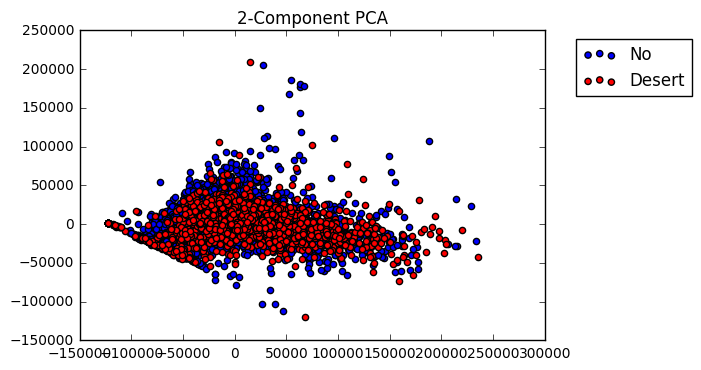

K: 1 F1: 0.64105156724
K: 3 F1: 0.683518705763
K: 5 F1: 0.716380182002
K: 7 F1: 0.725985844287
K: 9 F1: 0.729524772497
K: 11 F1: 0.732558139535
K: 13 F1: 0.736097067745
K: 15 F1: 0.736602628918


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [50]:
#Using original labels

def PCA_Scatter():
    # Fit 2-dimensional PCA
    pca_2d=PCA(n_components=2)
    pca_train = pca_2d.fit_transform(split_train_data)
    pca_test = pca_2d.fit_transform(split_test_data)
    print(split_train_data.shape[0])
    print(pca_train[0:10])
    print(pca_train.shape)

    #Split 2d PCA data into desert and non-desert sets
    print(split_train_labels2.shape)
    f = np.concatenate((pca_train, split_train_labels), axis=1)
    print(f.shape)
    pca_train_no = f[np.where(f[:,2]==0)]
    print(pca_train_no.shape)
    pca_train_yes = f[np.where(f[:,2]==1)]
    print(pca_train_yes.shape)
    
    # Plot the data
    plt.scatter(pca_train_no[:,0],pca_train_no[:,1],c='blue',label="No")
    plt.scatter(pca_train_yes[:,0],pca_train_yes[:,1],c='red',label="Desert")


    plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
    plt.title("2-Component PCA")
    plt.show()
    for i in [1,3,5,7,9,11,13,15]:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(pca_train, split_train_labels)
        test_preds = knn.predict(pca_test)
        print ("K:", i, "F1:", metrics.accuracy_score(split_test_labels, test_preds))
PCA_Scatter()